In [1]:
import pandas as pd
df = pd.read_csv('dulieuxettuyendaihoc.csv',
                 header=0,delimiter=',',encoding='utf-8')

df.rename(columns={'NGAYTHI':'NT',
                   'DINHHUONGNGHENGHIEP':'NGHE'}, 
                   inplace=True)
df


,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE
0,SV001,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


LỌC VÀ MÔ TẢ DỮ LIỆU

In [3]:
dfKhoiC = df.loc[df['KT'] == 'C']
dfKhoiC['M1']
dfKhoiC['M1'].describe()

# df.loc[df['KT'] == 'C'] lọc ra các dòng có giá trị của cột KT là 'C' (có thể là khối C).
# Hàm describe() cung cấp các thông số thống kê như số lượng, giá trị trung bình, độ lệch chuẩn cho cột M1.


count    14.000000
mean      5.660714
std       0.812209
min       4.750000
25%       5.062500
50%       5.250000
75%       6.375000
max       7.000000
Name: M1, dtype: float64

 KIỂM ĐỊNH t-test MỘT MẪU:

In [4]:
import scipy.stats as stats
stats.ttest_1samp(dfKhoiC['M1'], popmean=4.0)
# Hàm ttest_1samp() kiểm định xem trung bình của cột M1 khối C có khác biệt đáng kể
#  so với giá trị trung bình giả định là 4.0 hay không.

TtestResult(statistic=np.float64(7.650519779016341), pvalue=np.float64(3.6339826927369557e-06), df=np.int64(13))

Kiểm định t-test hai mẫu độc lập:

In [5]:
stats.ttest_ind(dfKhoiC['M1'], dfKhoiC['M2'], equal_var=True)
# Hàm ttest_ind() so sánh trung bình của hai nhóm độc lập (ở đây là cột M1 và M2 của khối C), 
# giả định rằng hai nhóm có phương sai bằng nhau.


TtestResult(statistic=np.float64(2.5331368604654054), pvalue=np.float64(0.017676922552296807), df=np.float64(26.0))

 Kiểm định Z (Một mẫu và hai mẫu):

In [6]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(df['M1'], value=8.0)
ztest(df['M1'], df['M2'], value=0)
# Kiểm định Z thứ nhất kiểm tra xem trung bình của cột M1 có khác biệt đáng kể so với 8.0 không.
# Kiểm định Z thứ hai so sánh trung bình của M1 và M2, với sự khác biệt giả định bằng 0.

(np.float64(-2.9004757923795), np.float64(0.0037259661678783573))

Hệ số tương quan Pearson:

In [7]:
from scipy.stats.stats import pearsonr
pearsonr(df['M1'], df['M2'])
# Hàm pearsonr() tính toán hệ số tương quan Pearson và giá trị p để kiểm tra
# mối quan hệ tuyến tính giữa hai biến M1 và M2.
# Giá trị p-value, cho thấy mối tương quan này có ý nghĩa thống kê (vì p-value < 0.05).
# Nếu p-value > 0.05, bạn có thể coi rằng không có bằng chứng thuyết phục về mối liên hệ tuyến tính giữa hai biến.


C:\Users\Admin\AppData\Local\Temp\ipykernel_21156\3495311678.py:1: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=np.float64(0.03515405725785023), pvalue=np.float64(0.7284198928723625))

Kiểm định Fisher's Exact:


In [8]:
crosdata = pd.crosstab(df['GT'], [df['NGHE']], rownames=['GT'], colnames=['NGHE'])
odd_ratio, p_value = stats.fisher_exact(crosdata)
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))
# 1-pd.crosstab() tạo ra bảng chéo giữa cột GT (giới tính) và NGHE (định hướng nghề nghiệp).
# 2-Hàm fisher_exact() thực hiện kiểm định Fisher, dùng cho các bảng chéo nhỏ để kiểm tra xem
# hai biến có độc lập với nhau không. Trả về tỷ lệ odds và giá trị p.
#Odd ratio: Tỷ số odds (tỷ số chênh), đo lường mức độ liên quan giữa hai biến.
# Odd ratio > 1: Cho thấy có một mối liên hệ tích cực giữa hai biến (một biến tăng thì biến kia cũng tăng).
# Odd ratio < 1: Cho thấy có một mối liên hệ tiêu cực (khi một biến tăng, biến kia có xu hướng giảm).
# Odd ratio = 1: Không có mối liên hệ.
# P-value: Giá trị p giúp kiểm định xem mối quan hệ này có ý nghĩa thống kê hay không.
# Nếu p-value < 0.05, bạn có thể bác bỏ giả thuyết không (null hypothesis), nghĩa là có mối quan hệ giữa hai biến.
# Nếu p-value ≥ 0.05, không có bằng chứng thống kê đủ mạnh để khẳng định mối liên hệ giữa hai biến.

odd ratio is : 0.575
p_value is : 0.22763927303454412


 Kiểm định Chi-Square:


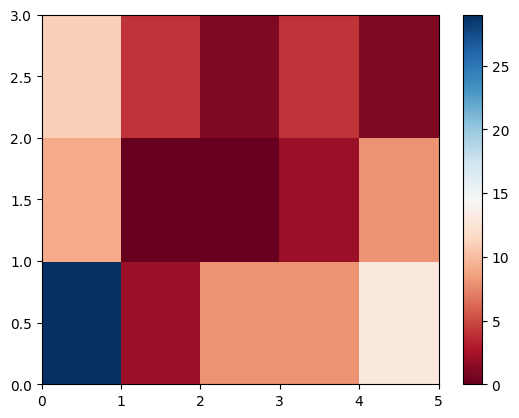

Dependent (reject H0)


In [11]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
crosdata = pd.crosstab(df['KV'], [df['KT']], rownames=['KV'], colnames=['KT'])
plt.pcolor(crosdata, cmap='RdBu')
plt.colorbar()
plt.show()
stat, p, dof, expected = chi2_contingency(crosdata)
alpha = 0.05
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

# Tạo bảng chéo giữa KV (khu vực) và KT (khối thi) và biểu diễn nó bằng heatmap (bản đồ nhiệt).
# Hàm chi2_contingency() thực hiện kiểm định Chi-Square để xem hai biến này có độc lập hay không.
#  Nếu giá trị p <= 0.05, ta bác bỏ giả thuyết H0 và kết luận rằng hai biến phụ thuộc.

Phân tích phương sai (ANOVA):

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('M1 ~ GT', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
model = ols('M1 ~ GT + KV + GT:KV', data=df).fit()
result = sm.stats.anova_lm(model, type=2)
print(result)

# 1- Hàm ols() xây dựng mô hình để kiểm tra ảnh hưởng của biến GT (giới tính)
# lên biến M1 và thực hiện phân tích phương sai loại I (Type I ANOVA).
# 2- Mô hình thứ hai kiểm tra ảnh hưởng kết hợp của GT, KV (khu vực), và tương tác giữa chúng (GT:KV)
# lên M1 thông qua phân tích phương sai loại II (Type II ANOVA).
#Kết quả của ANOVA
# Bảng kết quả ANOVA sẽ có các cột chính sau:
# sum_sq: Tổng bình phương của các yếu tố.
# df: Số bậc tự do tương ứng với các yếu tố.
# F: Giá trị F-statistic, cho biết tỷ lệ giữa phương sai giữa các nhóm và phương sai trong nhóm.
# PR(>F): p-value tương ứng với F-statistic. Nếu giá trị này nhỏ hơn mức alpha (thường là 0.05), bạn có thể bác bỏ giả thuyết không.

# Giải thích kết quả
# Giá trị F:

# Nếu giá trị F lớn cho thấy có sự khác biệt giữa các nhóm trong yếu tố đó.
# Nếu giá trị F nhỏ, điều này cho thấy không có sự khác biệt đáng kể.
# p-value:

# Nếu p-value < 0.05, bác bỏ giả thuyết không và kết luận rằng có sự khác biệt đáng kể giữa các nhóm.
# Nếu p-value ≥ 0.05, không bác bỏ giả thuyết không, tức là không có đủ bằng chứng để cho thấy sự khác biệt.

            df      sum_sq   mean_sq         F    PR(>F)
GT         1.0    1.203141  1.203141  0.598960  0.440917
KV         2.0    3.493206  1.746603  0.869512  0.422500
GT:KV      2.0    7.349290  3.674645  1.829350  0.166186
Residual  94.0  188.819363  2.008717       NaN       NaN


 Hồi quy tuyến tính đơn giản và hồi quy tuyến tính bội:

In [14]:
import statsmodels.api as sm
X_with_constant = sm.add_constant(df[["M1"]].values)
y = df[['M3']].values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())
# Mô hình hồi quy tuyến tính đơn giản kiểm tra khả năng dự đoán M3 dựa trên M1.
# Mô hình hồi quy tuyến tính bội kiểm tra khả năng dự đoán M3 dựa trên cả M1 và M2.
# Hàm add_constant() thêm hằng số để tạo hệ số chặn (intercept).

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.03439
Date:                Fri, 04 Oct 2024   Prob (F-statistic):              0.853
Time:                        14:07:45   Log-Likelihood:                -145.41
No. Observations:                 100   AIC:                             294.8
Df Residuals:                      98   BIC:                             300.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8238      0.295     16.338      0.0

Hồi quy tuyến tính không có hệ số chặn:

In [16]:
X = df[["M1", "M2"]].values
y = df[['M3']].values
result = sm.OLS(y, X).fit()
print(result.summary())
# Ở đây, hồi quy tuyến tính được thực hiện mà không có hằng số để dự đoán M3 dựa trên M1 và M2.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              500.8
Date:                Fri, 04 Oct 2024   Prob (F-statistic):                    3.54e-52
Time:                        14:09:02   Log-Likelihood:                         -181.63
No. Observations:                 100   AIC:                                      367.3
Df Residuals:                      98   BIC:                                      372.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [18]:
# Phần 1: Thông tin chung
# -Dep.Variable (y): Biến phụ thuộc trong mô hình hồi quy, tức là biến cần được dự đoán.
# -Model (OLS): Mô hình hồi quy tuyến tính (Ordinary Least Squares - OLS).
# -Method (Least Squares): Phương pháp ước lượng sử dụng phương pháp bình phương bé nhất.
# -No.Observations (100): Số lượng quan sát trong dữ liệu (ở đây là 100 quan sát).
# -Df.Residuals (98): Bậc tự do của phần dư (số lượng quan sát trừ đi số biến độc lập - 100 - 2 = 98).
# -Df.Model (2): Số lượng biến độc lập trong mô hình (ở đây là 2 biến x1 và x2).
# -Covariance Type (nonrobust): Loại ma trận hiệp phương sai (ở đây không phải là ma trận điều chỉnh để xử lý heteroscedasticity).

# Phần 2: Kết quả của các biến độc lập
# coef (hệ số hồi quy): Hệ số hồi quy của các biến:

# x1: Hệ số hồi quy là 0.4062. Điều này có nghĩa là khi biến x1 tăng lên 1 đơn vị, giá trị dự đoán của biến phụ thuộc y sẽ tăng thêm 0.4062 đơn vị.
# x2: Hệ số hồi quy là 0.7367, nghĩa là khi biến x2 tăng lên 1 đơn vị, giá trị y dự đoán sẽ tăng thêm 0.7367 đơn vị.
# std err (standard error): Sai số chuẩn của các hệ số hồi quy. Đây là thước đo độ chính xác của các hệ số hồi quy. Càng nhỏ càng tốt.

# x1: Sai số chuẩn là 0.091.
# x2: Sai số chuẩn là 0.083.
# t (t-statistic): Giá trị thống kê t dùng để kiểm định ý nghĩa của hệ số hồi quy. Giá trị t lớn cho thấy hệ số đó có ý nghĩa thống kê.

# x1: t-statistic là 4.466.
# x2: t-statistic là 8.879.
# P>|t|: P-value là xác suất mà hệ số hồi quy có thể bằng 0. Nếu p-value nhỏ hơn 0.05 (ở mức ý nghĩa 5%), thì hệ số đó có ý nghĩa thống kê.

# x1: P-value là 0.000, có ý nghĩa thống kê.
# x2: P-value là 0.000, cũng có ý nghĩa thống kê.
# [0.025 0.975] (confidence interval): Khoảng tin cậy 95% cho hệ số hồi quy. Hệ số thực tế nằm trong khoảng này với xác suất 95%.

# x1: Khoảng tin cậy từ 0.226 đến 0.587.
# x2: Khoảng tin cậy từ 0.572 đến 0.901.

# Phần 3: Các chỉ số của mô hình
# R-squared (0.911): Hệ số xác định, cho biết mô hình giải thích được bao nhiêu phần trăm phương sai của biến phụ thuộc. Ở đây là 91.1%, tức là mô hình giải thích được 91.1% biến thiên của y.

# Adj. R-squared (0.909): Hệ số R-squared điều chỉnh, điều chỉnh cho số biến trong mô hình. Giá trị này thường nhỏ hơn R-squared.

# F-statistic (500.8): Giá trị F-statistic cho kiểm định tổng thể của mô hình, dùng để xem xét liệu các biến độc lập có ảnh hưởng đáng kể đến biến phụ thuộc không.

# Prob (F-statistic) (3.54e-52): P-value của kiểm định F-statistic. P-value rất nhỏ, cho thấy mô hình có ý nghĩa tổng thể.

# Log-Likelihood (-181.63): Giá trị của hàm log-likelihood, một thước đo về chất lượng của mô hình; càng lớn càng tốt.

# AIC (367.3) và BIC (372.5): Các chỉ số chọn mô hình (Akaike Information Criterion và Bayesian Information Criterion). Giá trị càng nhỏ càng tốt khi so sánh các mô hình khác nhau.

# Phần 4: Thống kê chẩn đoán
# Omnibus (3.155) và Prob(Omnibus) (0.206): Kiểm định Omnibus dùng để kiểm tra tính chuẩn của phân phối phần dư. P-value > 0.05 cho thấy phần dư có phân phối chuẩn.

# Durbin-Watson (1.975): Chỉ số này kiểm tra hiện tượng tự tương quan của phần dư. Giá trị lý tưởng khoảng 2, nếu quá gần 0 hoặc 4, thì phần dư có thể bị tự tương quan.

# Jarque-Bera (2.527) và Prob(JB) (0.283): Kiểm định Jarque-Bera để kiểm tra xem phần dư có phân phối chuẩn không. P-value > 0.05 cho thấy phần dư có phân phối chuẩn.

# Skew (-0.358): Thống kê về độ lệch của phân phối phần dư. Ở đây phần dư có độ lệch hơi nhỏ (âm).

# Kurtosis (3.306): Thống kê độ nhọn của phân phối phần dư. Giá trị gần 3 cho thấy phân phối phần dư gần với phân phối chuẩn.

# Cond. No. (4.65): Số điều kiện của ma trận X. Giá trị lớn có thể chỉ ra hiện tượng đa cộng tuyến. Ở đây giá trị khá nhỏ, nên không có vấn đề đa cộng tuyến.